In [9]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf

In [10]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [11]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [12]:
def draw_landmarks(image, results):
   #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
   #  mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [13]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    '''mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                              ) '''
    # Draw pose connections
    # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
    #                          mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
    #                          mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
    #                          ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
     #Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [16]:
cap = cv2.VideoCapture(0)
#Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

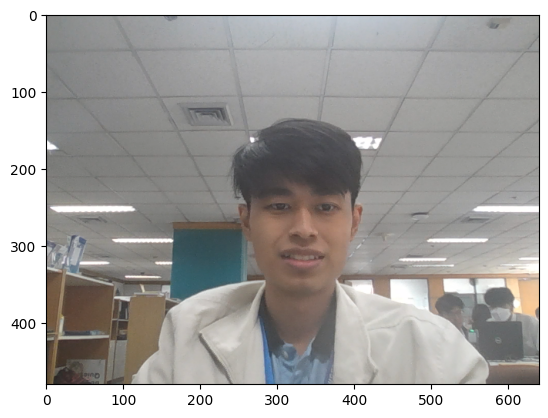

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Extract Keypoint

In [9]:
def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)##
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

## Setup Folder for array collection

In [10]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data(1)') 

# Actions that we try to detect
actions = np.array(['left', 'right', 'up', 'down'])

# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 10

# Folder start
start_folder = 10

In [11]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## Collecting Keypoint

In [12]:
# cap = cv2.VideoCapture(0)
#  # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#      # NEW LOOP
#      # Loop through actions
#      for action in actions:
#          # Loop through sequences aka videos
#          for sequence in range(no_sequences):
#              # Loop through video length aka sequence length
#              for frame_num in range(sequence_length):

#                  # Read feed
#                  ret, frame = cap.read()

#                  # Make detections
#                  image, results = mediapipe_detection(frame, holistic)
# #                print(results)

#                  # Draw landmarks
#                  draw_styled_landmarks(image, results)
                
#                  # NEW Apply wait logic
#                  if frame_num == 0: 
#                      cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                 cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                      cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                      # Show to screen
#                      cv2.imshow('OpenCV Feed', image)
#                      cv2.waitKey(500)
#                  else: 
#                      cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                      cv2.imshow('OpenCV Feed', image)
                
#                  # NEW Export keypoints
#                  keypoints = extract_keypoints(results)
#                  npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                  np.save(npy_path, keypoints)

#                  # Break gracefully
#                  if cv2.waitKey(10) & 0xFF == ord('q'):
#                      break
                    
#      cap.release()
#      cv2.destroyAllWindows()

## Preprocess Data and Create Labels and Features

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [14]:
label_map = {label:num for num, label in enumerate(actions)}

In [15]:
label_map

{'left': 0, 'right': 1, 'up': 2, 'down': 3}

In [16]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [17]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

## Build Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [20]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Conv1D(256, kernel_size=3, activation='sigmoid', input_shape=(10, 126)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [22]:
res = [.7, 0.2, 0.1]

In [23]:
actions[np.argmax(res)]

'left'

In [24]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Check the shapes of X_train and y_train
print(X_train.shape, y_train.shape)

(38, 10, 126) (38, 4)


In [26]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000


2/2 [==============================] - 1s 5ms/step - loss: 1.4697 - accuracy: 0.2632
Epoch 2/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.4182 - accuracy: 0.2632
Epoch 3/1000
2/2 [==============================] - 0s 0s/step - loss: 1.4320 - accuracy: 0.2368
Epoch 4/1000
2/2 [==============================] - 0s 0s/step - loss: 1.4055 - accuracy: 0.2368
Epoch 5/1000
2/2 [==============================] - 0s 0s/step - loss: 1.3971 - accuracy: 0.3684
Epoch 6/1000
2/2 [==============================] - 0s 0s/step - loss: 1.3951 - accuracy: 0.2632
Epoch 7/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.4089 - accuracy: 0.4211
Epoch 8/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.3868 - accuracy: 0.4474
Epoch 9/1000
2/2 [==============================] - 0s 9ms/step - loss: 1.3465 - accuracy: 0.4737
Epoch 10/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.3289 - accuracy: 0.3421
Epoch 11/1000
2/2 [================

In [27]:
# import matplotlib.pyplot as plt
# plt.plot(history.history['categorical_accuracy'])
# #plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('categorical_accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# plt.plot(history.history['loss'])
# #plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.show()

In [28]:
# plt.plot(history.history['loss'])
# plt.title('Model Training Loss and Accuracy')
# plt.plot(history.history['categorical_accuracy'])
# plt.plot(history.history['loss'])
# plt.ylabel('Loss/Accuracy')
# plt.xlabel('Epoch')
# plt.legend(loc="lower left")
# plt.show()

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 256)            97024     
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 256)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 128)            98432     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                        

## Make Prediction

In [30]:
res = model.predict(X_test)

1/1 [==============================] - 0s 210ms/step


In [31]:
# actions[np.argmax(res[4])]

In [32]:
# actions[np.argmax(y_test[4])]

## Save Weight

In [33]:
model.save('actionJupyter.h5')

c:\Users\Nattakit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
#del model

In [35]:
model.load_weights('actionJupyter.h5')

## Evaluation using Confusion Matrix and Accuracy

In [36]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [37]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 31ms/step


In [38]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [39]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]]], dtype=int64)

In [40]:
accuracy_score(ytrue, yhat)

1.0

## Test in Real Time

In [41]:
from scipy import stats
import pyautogui

In [42]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [49]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)  # Define your mediapipe_detection function
        print(results)

        # Extract keypoints and maintain a sequence
        keypoints = extract_keypoints(results)  # Define your extract_keypoints function
        sequence.append(keypoints)
        sequence = sequence[-10:]  # Maintain the last 10 frames
        
        # app_title = "Pacman"
        # pacman_window = pyautogui.getWindowsWithTitle(app_title)

        # if pacman_window:
        #     pacman_window[0].activate()
        #     # time.sleep(1)  # Add a delay if needed
        # else:
        #     print(f"Window with title '{app_title}' not found.")


        if len(sequence) == 10:
            # Reshape the sequence to match the model's input shape
            input_sequence = np.expand_dims(sequence, axis=0)

            # Predict using the model
            res = model.predict(input_sequence)[0]
            print(actions[np.argmax(res)])  # Define 'actions' based on your use case         
            
            if actions[np.argmax(res)] == 'left':
                pyautogui.press('left')
            elif actions[np.argmax(res)] == 'right':
                pyautogui.press('right')
            elif actions[np.argmax(res)] == 'up':
                pyautogui.press('up')
            elif actions[np.argmax(res)] == 'down':
                pyautogui.press('down')

            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-3:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
left
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
left
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
left
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
left
<class 'mediapipe.python.soluti